# Градиентный спуск
Градиент - это вектор, составленный из частных производный функции по всем её аргументам, указывающий направление наибольшего возрастания функции. (так как мы наоборот хотим найти минимум функции, то будем считать, что речь идет о минус-градиенте или антиградиенте).

### В чем заключается метод?


Одной из основных задач машинного обучения является задача минимизации функции потерь(функции ошибки) или, другими словами, задача оптимизации.
Градиентый спуск - это метод, который помогает эту задачу решить. Как именно? Разберемся чуть позже, сначала нужно вспомнить что такое градиент, поэтому немного математики.


Пусть у нас есть дифференцируемая функция (для простоты возьмём параболу), минимум которой легко найти из уравнения:

#### $\frac{\partial f(x)}{\partial x}=0$


В таком случае задача решается с помощью несложных вычислений. Однако функции с которыми приходится работать гораздо сложнее, в них может быть несколько минимумов/максимумов, а значит найти минимум функции становится не так уж просто. 

*Лирическое отступление:*


*Представьте, что вы находитесь на высокой горе. Красиво конечно, но холодно и одиноко. Вы наслаждались видом, а когда захотели спуститься, обнаружили, что не видите дорогу обратно из-за тумана. Вы не знаете в какую сторону вам двигаться, но знаете, что ваш дом находится в самой низкой точке. 
Пусть вы носите с собой строительный уровень(ну кто вас знает) и вот наступил тот момент, когда он может вам реально пригодиться. С его помощью вы определили, где спуск и пошли в ту сторону...*


Для решения сложной задачи оптимизации есть  **алгоритмы направленного поиска**, одним из которых является градиентный спуск. 


**Градиентный спуск -**  метод нахождения минимального значения функции потерь - поиск самой глубокой впадины в этой функции.

![image.png](https://neurohive.io/wp-content/uploads/2018/11/minimum-funkcii-metod-gradientnogo-spuska-570x320.png)


Благодаря математическому анализу мы знаем, что наклон графика функции – производная от функции по переменной. То есть с помощью производной мы можем узнать, в каком направлении находится ближайшая впадина.


Рассмотрим опять же на примере параболы:

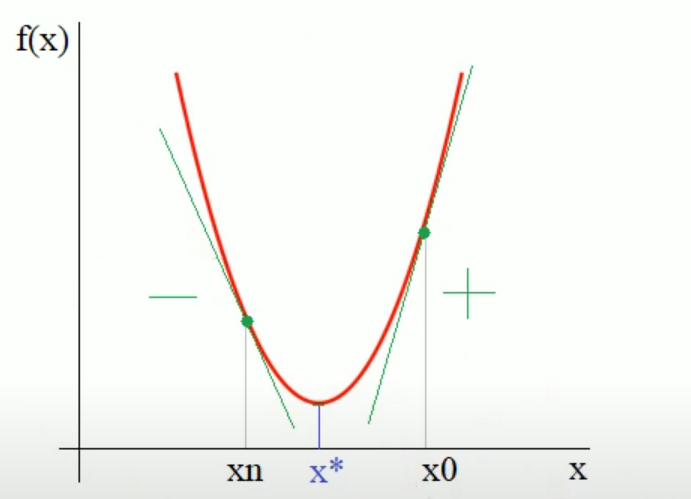

Из рисунка видно, что справа от минимума происзодная принимает "+" значение, а слева "-". Предположим, что мы находимся в точке x0, тогда чтобы придти в x* необходимо уменьшать x (так как мы находимся в области положительных производных). Соотвественно в области отрицательных производных x необходимо увеличивать. 

#### $x_{n+1}=x_n-\frac{\partial f(x)}{\partial x}=0$

### Скорость обучения (Learning rate)



*Вы проверяли направление спуска каждый шаг, что привело вас в яму. Она ниже, чем точка из которой вы начали спуск, так что по сути, вы пришли в нужное место, но почему-то вы всё-таки хотите домой. Допустим, вам удалось вылезти из этой ямы. Теперь вы набрались смелости и решили проверять направление спуска не каждый шаг, а каждые 10, и спускаться бегом, а не шагом.*


**Коэффициент скорости обучения –** это параметр, определяющий порядок того, как мы будем корректировать наши весы с учётом функции потерь в градиентном спуске. Чем ниже его величина, тем медленнее мы движемся (*спускаемся с горы*). 

*Вы попали в яму, потому что двигались слишком медленно. На каждом шаге вы проверяли, куда вам идти дальше. А если бы вы бежали, то могли бы перепрыгнуть эту яму и не тратить время на то, чтобы из неё выбираться.*


Зачем нам коэффициент скорости обучения?


Значение 
#### $\frac{\partial f(x)}{\partial x}$

может оказаться слишком большим, из-за чего мы сильно перескочим минимум и отдалимся от решения задачи(* по дороге домой перепрыгнули обрыв и снова пошли в гору, а не с горы*). 

Для того, чтобы этого не происходило производную домножают на какое-то число, обозначим его через $\alpha$. 


*проверяем направление спуска с горы не каждый шаг, а каждые 2 или 10, или 100 шагов, чтобы больше не останавливаться в локальных минимумах (ямах)*


В машинном обучение это число называют **скоростью обучения** или шаг сходимости.
#### $x_{n+1}=x_n-\alpha * \frac{\partial f(x)}{\partial x}$

![image.png](https://habrastorage.org/webt/dn/j1/nj/dnj1njm2womrahwlbv_dzs25xqs.jpeg)


Сейчас мы перейдем к примерам, а пока *Счастливый конец*:
*Вы всё-таки добрались до дома.*


### Небольшой пример

Попробуем воспользоваться методом градиентного спука для нахождения минимума у функции $f(x) = x^2-5x+5$.
Её производная: $2x - 5$



2.400000000000001


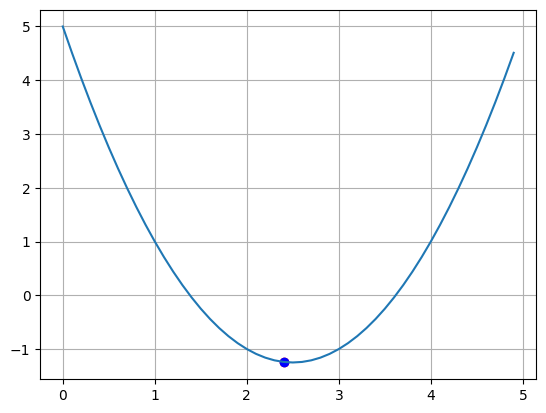

In [1]:
"""Данный код нежелательно запускать в браузерной версии (не будет видно анимации)"""
import numpy as np
import matplotlib.pyplot as plt 
import time

def f(x):
    return x*x -5*x + 5 # f(x)

def df(x):
    return 2*x - 5 # df(x)

N = 40 # число итераций (сколько раз мы будем изменять значение x)
xx = 0 # начальный x 
lamda = 0.1 # шаг сходимости

x_plt = np.arange(0, 5, 0.1) # диапазон изменения аргумента (для рисования графика)
f_plt = [f(x) for x in x_plt] # значение f(x) для визуализации

plt.ion() #интерактивный режим отображения графиков
fig, ax = plt.subplots() # Создаем график
ax.grid(True) #Отображение сетки на графике

ax.plot(x_plt, f_plt) # отобразим начальный график
point = ax.scatter(xx, f(xx), c='red') # отображаем текущую точку

for i in range(N):
    xx -= lamda*np.sign(df(xx)) # изменяем текущее положение x
    point.set_offsets([xx, f(xx)]) # отображаем новое положение точки на графике
    #анимируем движение точки
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(0.1)
    
plt.ioff() #выключение интерактивного режима
print(xx) # полученное значение x
ax.scatter(xx, f(xx), c='blue') # рисуем итоговый график
plt.show()



### Недостаток стандартного(пакетного) градиентного спуска

Предположим, что наша функция выглядит следующим образом: 
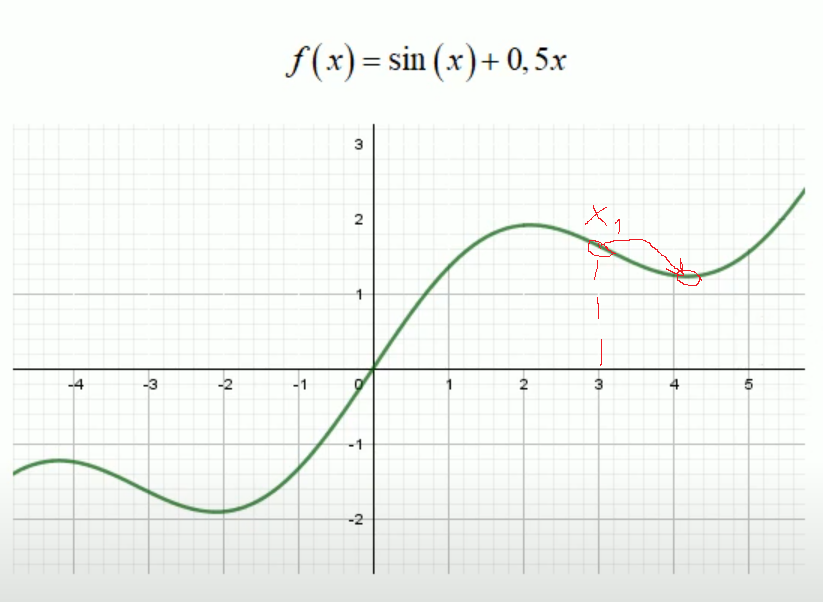

Тогда, начав в точке x1, мы неизбежно попадем в локальным мимнимум, а не в глобальный. (это можно проверить, заменив функцию в прошлом примере). О том как этого избежать будет написано далее.

### Почему метод градиентного спуска используют все?

Дело в том, что с увелечением числа параметров сложность нахождения минимума увеличвается практически линейно, тогда как большинство других алгоритмов становятся неприменимы на практике при количестве параметров более 1000. При этом в нейросетях количество параметров может легко достигать 10000.


# Градиентный спуск (ГС, Gradient Descent, GD) (Общий случай)



### Формулировка и алгоритм

Пусть задана целевая функция $F(x)$, отображающая некое множество $\mathbb{X}$ на множесто действительных чисел $\mathbb{R}$. Необходимо найти минимум функции на множестве $\mathbb{X}$: $F(x) \rightarrow \min_{x \in \mathbb{X}}$ (для поиска максимума аналогично ищется минимум $-F(x)$).

Для решения задачи оптимизации методом градиентного спуска выберем произвольную начальную точку $x_{0} \in \mathbb{X}$. Будем итеративно двигаться от текущей с некоторым шагом в сторону антиградиента ($-\nabla F$).

$$
\begin{align}
x^{[0]} &= x_{0}, \\ 
x^{[i+1]} &= x^{[i]} - \lambda \nabla F(x^{[i]}),
\end{align}
$$

где $x^{[i]}$ -- некоторая точка, полученная в процессе работы алгоритма на $i$-ой итерации, $\lambda \in \mathbb{R}$ -- шаг итерации (или скорость). Шаг может быть константой или меняться во время работы алгоритма. Момент остановки алгоритма определяется по некоторому правилу, например, $|F(x^{[i+1]}) - F(x^{[i]})| \le \epsilon$.

### Интерпретация
Рассмотрим метод градиентного спуска для конкретной задачи нахождения точки минимума для следующей функции

$sinx$∙$\mathrm{e}^{1-cos^2y}$$+$$cosy$∙$\mathrm{e}^{1-sin^2x}$$+$$(x-y)^2$

Будем использовать библиотеку numpy для функций sin, cos и exp. Также необходимо добавить matplotlib для построения графиков.
Рабочая область функции (заданный радиус) разбита на несколько точек. Выбраны точки локальных минимумов. После этого все координаты передаются функции в качестве аргументов и выбирается аргумент, дающий наименьшее значение. Затем применяется метод градиентного спуска. Также выберем приращение аргумента. Поскольку предел аргумента стремится к нулю, точность должна быть небольшой по сравнению с радиусом рабочей плоскости:

In [2]:
import numpy as np
import matplotlib.pyplot as plot
global_epsilon = 0.00001                # точность
radius = 8                                  # радиус рабочей плоскости
centre = (global_epsilon, global_epsilon)   # центр рабочего круга
arr_shape = 100                             # количество обработанных точек / 360
step = radius / arr_shape                   # шаг между двумя точками

Функция, для которой рассчитывается минимум:

In [3]:
def differentiable_function(x, y):
    return np.sin(x) * np.exp((1 - np.cos(y)) ** 2) + \
           np.cos(y) * np.exp((1 - np.sin(x)) ** 2) + (x - y) ** 2

Для дальнейшего разбиения плоскости необходим поворот вектора:

\begin{align}
        Rv = \begin{pmatrix}
        \cos\theta & -sin\theta \\
        \sin\theta & \cos\theta 
        \end{pmatrix} \begin{pmatrix}
        \
        x\\
        \
        y
        \end{pmatrix}=\begin{pmatrix}
        \
        xcos\theta-ysin\theta \\
        \
        xsin\theta+ycos\theta 
        \end{pmatrix}
\end{align}

Повернутый вектор будет вычисляться следующим образом:

In [4]:
def rotate_vector(length, a):
    return length * np.cos(a), length * np.sin(a)

Вычисление производных по оси Y и X, где эпсилон - значение y и x соответственно:

In [5]:
def derivative_y(epsilon, arg):
    return (differentiable_function(arg, epsilon + global_epsilon) -
    
        differentiable_function(arg, epsilon)) / global_epsilon
def derivative_x(epsilon, arg):
    return (differentiable_function(global_epsilon + epsilon, arg) -
   
         differentiable_function(epsilon, arg)) / global_epsilon

Расчёт градиента:
$$
\begin{align}
\nabla F=\frac{\partial f}{\partial x}i+\frac{\partial f}{\partial x}j+\frac{\partial f}{\partial x}k
\end{align}
$$

Поскольку градиент вычисляется для 2D-функции, k=0

Схема генерации точек. 

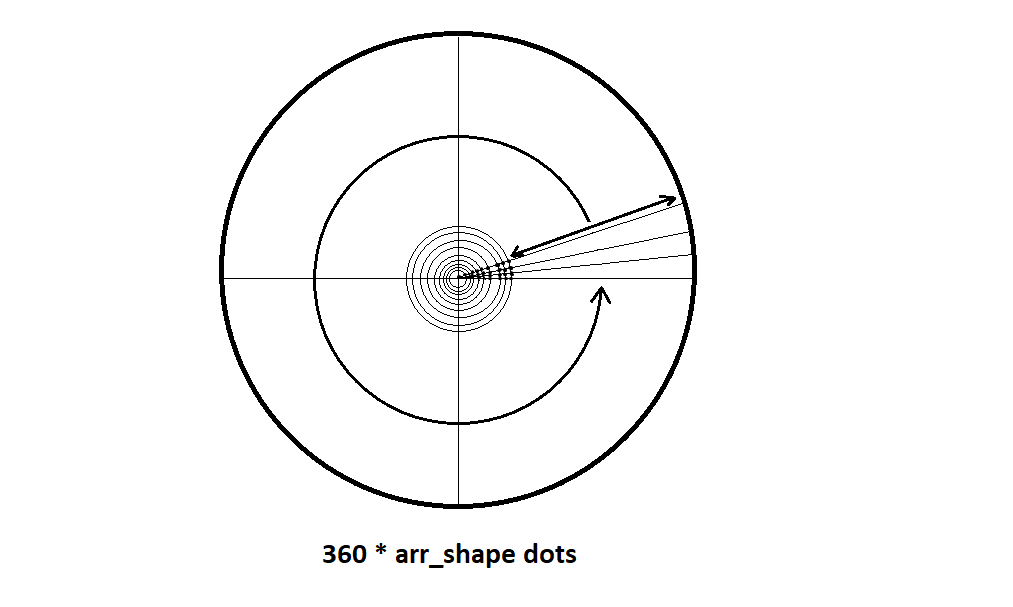

Возвращаемое значение представляет собой массив приблизительных локальных минимумов.


Локальный минимум распознается по смене знака производной с минуса на плюс.

In [6]:
def calculate_flip_points():
    flip_points = np.array([0, 0])
    points = np.zeros((360, arr_shape), dtype=bool)
    cx, cy = centre

    for i in range(arr_shape):
        for alpha in range(360):
            x, y = rotate_vector(step, alpha)
            x = x * i + cx
            y = y * i + cy
            points[alpha][i] = derivative_x(x, y) + derivative_y(y, x) > 0
            if not points[alpha][i - 1] and points[alpha][i]:
                flip_points = np.vstack((flip_points, np.array([alpha, i - 1])))

    return flip_points
calculate_flip_points()

array([[  0,   0],
       [  6,   6],
       [ 12,   6],
       ...,
       [268,  98],
       [311,  98],
       [355,  98]])

In [7]:
def pick_estimates(positions):
    vx, vy = rotate_vector(step, positions[1][0])
    cx, cy = centre
    best_x, best_y = cx + vx * positions[1][1], cy + vy * positions[1][1]

    for index in range(2, len(positions)):
        vx, vy = rotate_vector(step, positions[index][0])
        x, y = cx + vx * positions[index][1], cy + vy * positions[index][1]
        if differentiable_function(best_x, best_y) > differentiable_function(x, y):
            best_x = x
            best_y = y

    for index in range(360):
        vx, vy = rotate_vector(step, index)
        x, y = cx + vx * (arr_shape - 1), cy + vy * (arr_shape - 1)
        if differentiable_function(best_x, best_y) > differentiable_function(x, y):
            best_x = x
            best_y = y

    return best_x, best_y

Применение метода градиентного спуска:

In [8]:
def gradient_descent(best_estimates, is_x):
    derivative = derivative_x if is_x else derivative_y
    best_x, best_y = best_estimates
    descent_step = step
    value = derivative(best_y, best_x)

    while abs(value) > global_epsilon:
        descent_step *= 0.95
        best_y = best_y - descent_step \
            if derivative(best_y, best_x) > 0 else best_y + descent_step
        value = derivative(best_y, best_x)

    return best_y, best_x

Нахождение точки минимума:

In [9]:
def find_minimum():
    return gradient_descent(gradient_descent(pick_estimates(calculate_flip_points()), False), True)

In [10]:
def get_grid(grid_step):
    samples = np.arange(-radius, radius, grid_step)
    x, y = np.meshgrid(samples, samples)
    return x, y, differentiable_function(x, y)

Построение графика:

In [11]:
def draw_chart(point, grid):
    point_x, point_y, point_z = point
    grid_x, grid_y, grid_z = grid
    plot.rcParams.update({
        'figure.figsize': (4, 4),
        'figure.dpi': 200,
        'xtick.labelsize': 4,
        'ytick.labelsize': 4
    })
    ax = plot.figure().add_subplot(111, projection='3d')
    ax.scatter(point_x, point_y, point_z, color='red')
    ax.plot_surface(grid_x, grid_y, grid_z, rstride=5, cstride=5, alpha=0.7)
    plot.show()

Функция main и результат работы программы:

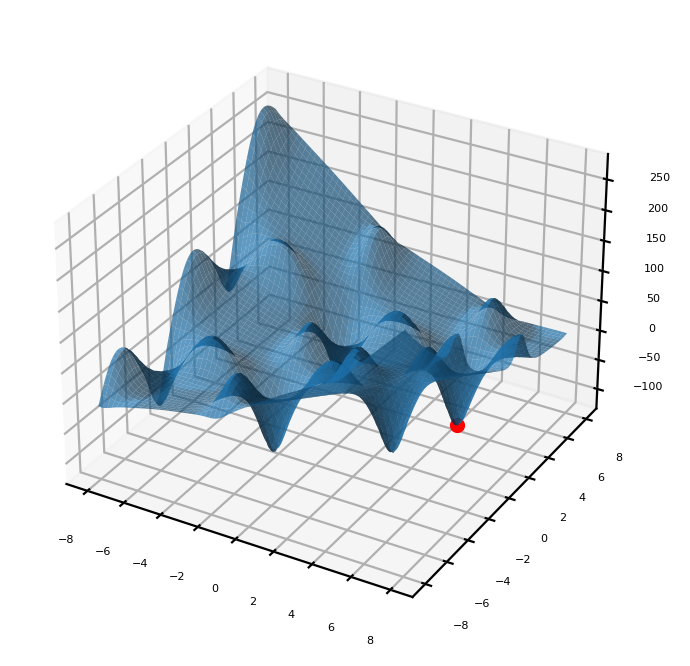

In [22]:
min_x, min_y = find_minimum()
minimum = (min_x, min_y, differentiable_function(min_x, min_y))
draw_chart(minimum, get_grid(0.05))

### ГС в задачах машинного обучения

$$
\theta^{[i+1]} = \theta^{[i]} - \eta \nabla_{\theta} \mathcal{L(\theta)}
$$

 - $\theta$ -- параметры модели;
 - $\eta$ -- скорость обучения (learning rate), параметр обучения или гиппер-параметр;
 - $\nabla_{\theta} \mathcal{L}$ -- градиент по параметрам $\theta$ функции цели $\mathcal{L}$.

### Масшатбирование признаков

Градиентный спуск работает хорошо, если линии уровня функции похожи на круги, как это показано на изображении 1. В этом случае, откуда бы мы не начинали, вектор градиента будет смотреть в сторону минимума функции и будет сходиться довольно быстро.
Если же линии уровня похожи на эллипсы, как на изображении 2, то градиентный спуск будет проблемным. Направление антиградиента будет слабо совпадать с направлением в сторону минимума функции, и градиентный спуск будет делать много лишних шагов, а его сходимость будет медленной. Более того, если риск расхождения градиентного спуска.
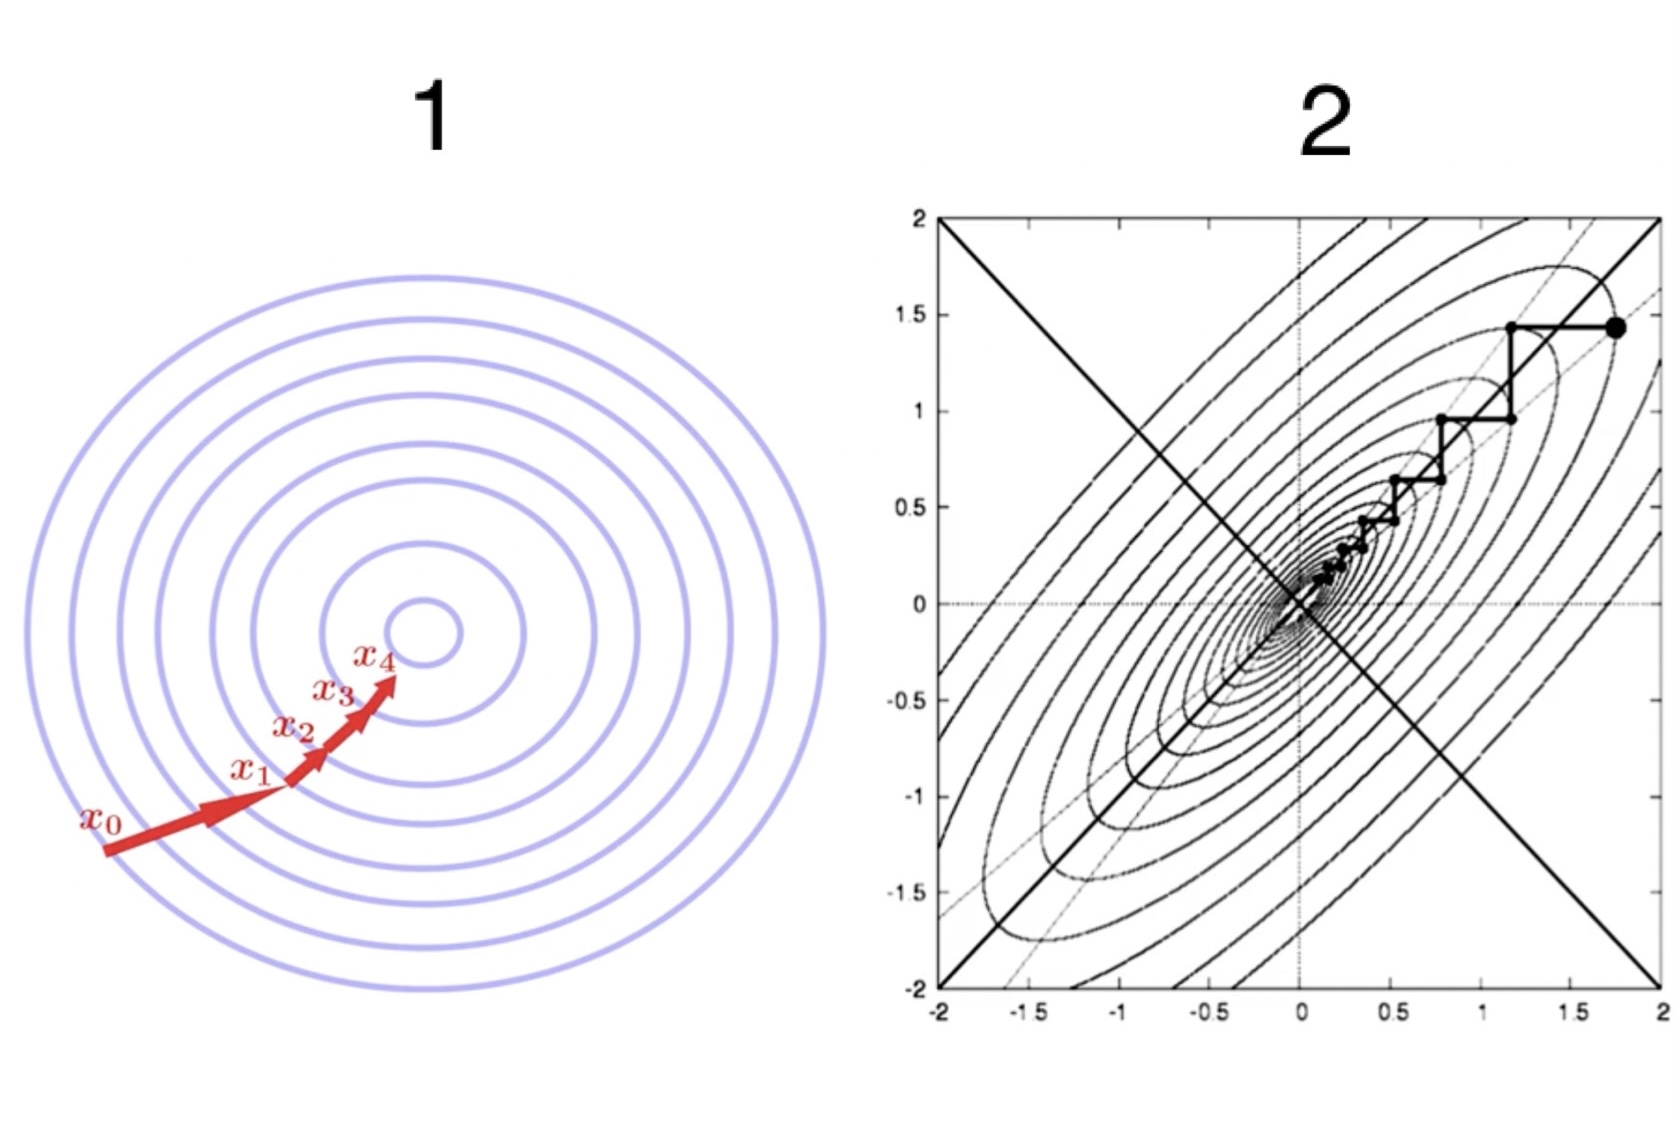
Градиентный спуск 1-с масштабированием;2-без масштабирования
### Скорость сходимости

Пусть $\epsilon$ достаточно малое число, задающее желаемую точность (погрешность) при поиске оптимума. Тогда, можно доказать, что ГС для большинства выпуклых функций сойдется к точке минимума с точностью $\epsilon$ за линейное относительно $\epsilon$ число шагов.

 ### ГС для линейной регрессии и $\mathcal{L} = MSE$

 $$
 \nabla_{\theta} MSE(\theta) = \frac{2}{m} X^{T}(X \theta - y)
 $$

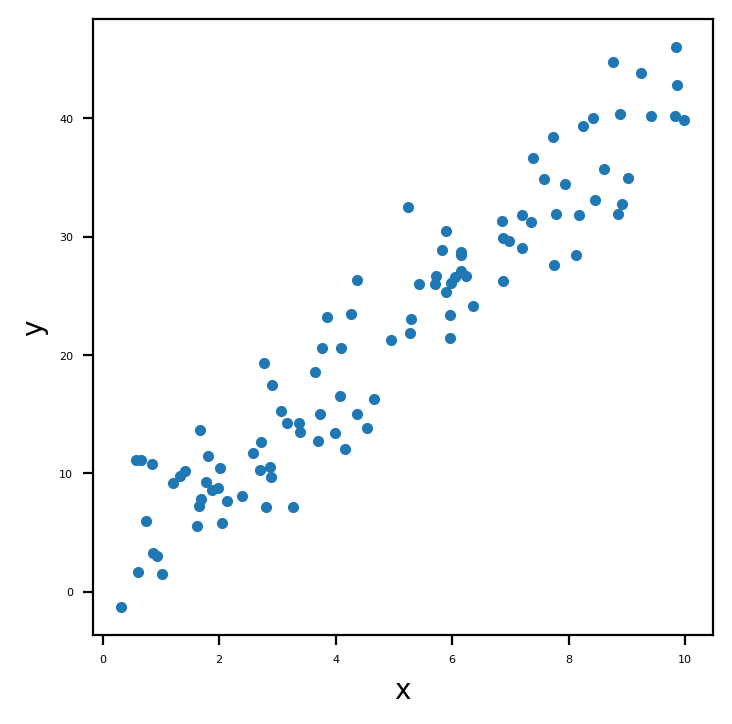

In [132]:
from matplotlib import pyplot as plt
import numpy as np  

real_a = 4 
real_b = 2

m = 100 # сколько будет данных 

X = 10*np.random.rand(m,1) # рандомим x
y = real_a*X + real_b + np.random.randn(m,1)*4 # создаем данные, которые необходимо будет предсказать

X_b = np.c_[np.ones((m, 1)), X] # создаем набор входных данных, инициализируюя b=1

plt.plot(X,y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

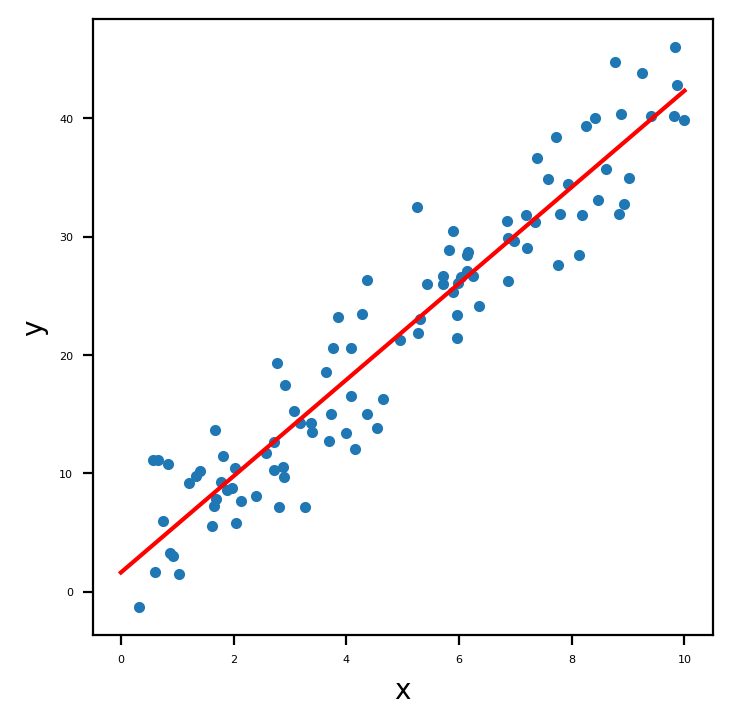

[[1.63805251]
 [4.0687116 ]]


In [133]:
def gd_linear_regresion(X, y, eta = 0.01, n_iter = 1000):
    m = X.shape[0]
    theta = np.random.randn(2,1)*5 # рандомно инициализируем значения для a и b
    theta_path = [] # шаги преобразования a и b
    
    for i in range(n_iter): 
        grads = 2/m * X_b.T.dot(X_b.dot(theta) - y) # MSE, получаем на сколько менять a и b
        theta = theta - eta * grads # изменяем текущее a и b
        theta_path.append(theta)
    
  
    return theta, np.array(theta_path)

theta, gd_theta_path = gd_linear_regresion(X, y)
x_for_line = np.array([0,10]) # две точки для построения прямой
pred_line = theta[1]*x_for_line + theta[0] # предсказываем y для всех точек из набора, подданого на взод

plt.plot(X, y, '.') # рисуем шум
plt.plot(x_for_line, pred_line, 'r-') # рисуем саму прямую
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print(theta)

# Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)

 - Менее подвержен "застреванию" в точках локального минимума, особенно когда функция издержек крайне нерегулярна;
 - Меняется значения параметра скачкообразно, скорее всего никогда не попадет в точку глобального минимума, а будет "прыгать" около нее;
 - Для решения этой проблемы можно производить так называемую *имитацию отжига (simulated annealing)*. То есть ввести *график обучения (learning schedule)* -- убывающая функция, которая будет определять значение шага обучения или *learning rate* на каждой итерации. 

На кадом шаге выбирает из набора только один случайный образец и вычисляет градиенты на основе одного единственного образца, а не целого обучающего набора как делает пакетный градиентный спуск

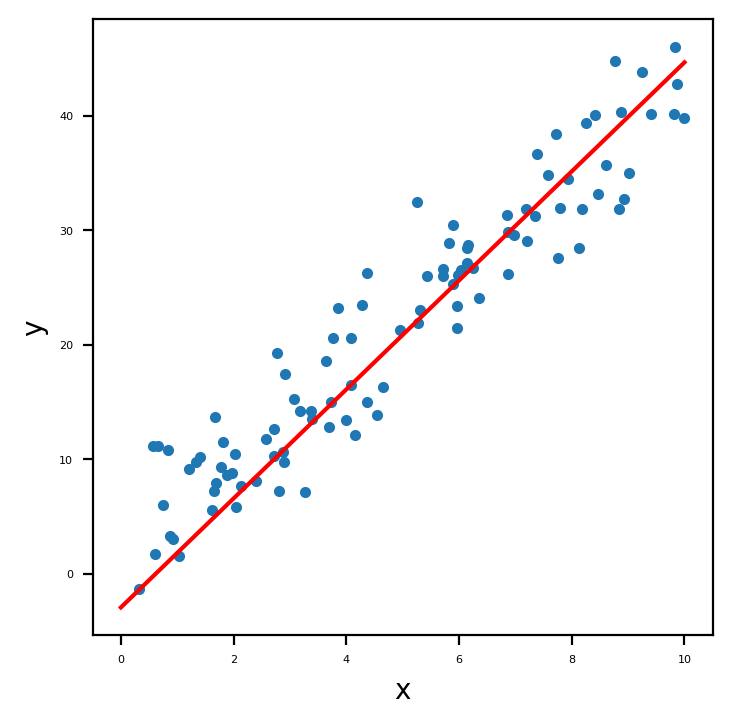

[[-2.95940024]
 [ 4.76348123]]


In [134]:
def sgd_linear_regresion(X, y, n_epochs = 10, eta = 0.01):
  m = X.shape[0]
  theta_path = [] # список, в котором будут хранится изменения a и b
  theta = np.random.randn(2,1)*5

  for i in range(n_epochs):
    shuffled_indices = np.random.permutation(m) # мешаем индексы 
    for i in range(m):
      xi = X_b[shuffled_indices[i]: shuffled_indices[i]+1] # обучаем не на всем наборе данных, а только на одном образце
      yi = y[shuffled_indices[i]: shuffled_indices[i]+1] # получаем правильные значения для этого образца
      grads = 2/m * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - eta * grads

      theta_path.append(theta)
  
  return theta, np.array(theta_path)

theta, sgd_theta_path = sgd_linear_regresion(X,y)
x_for_line = np.array([0,10])
pred_line = theta[1]*x_for_line + theta[0]

plt.plot(X,y, '.')
plt.plot(x_for_line, pred_line, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(theta)

Стохастический градиентный спуск. Поиск оптимума.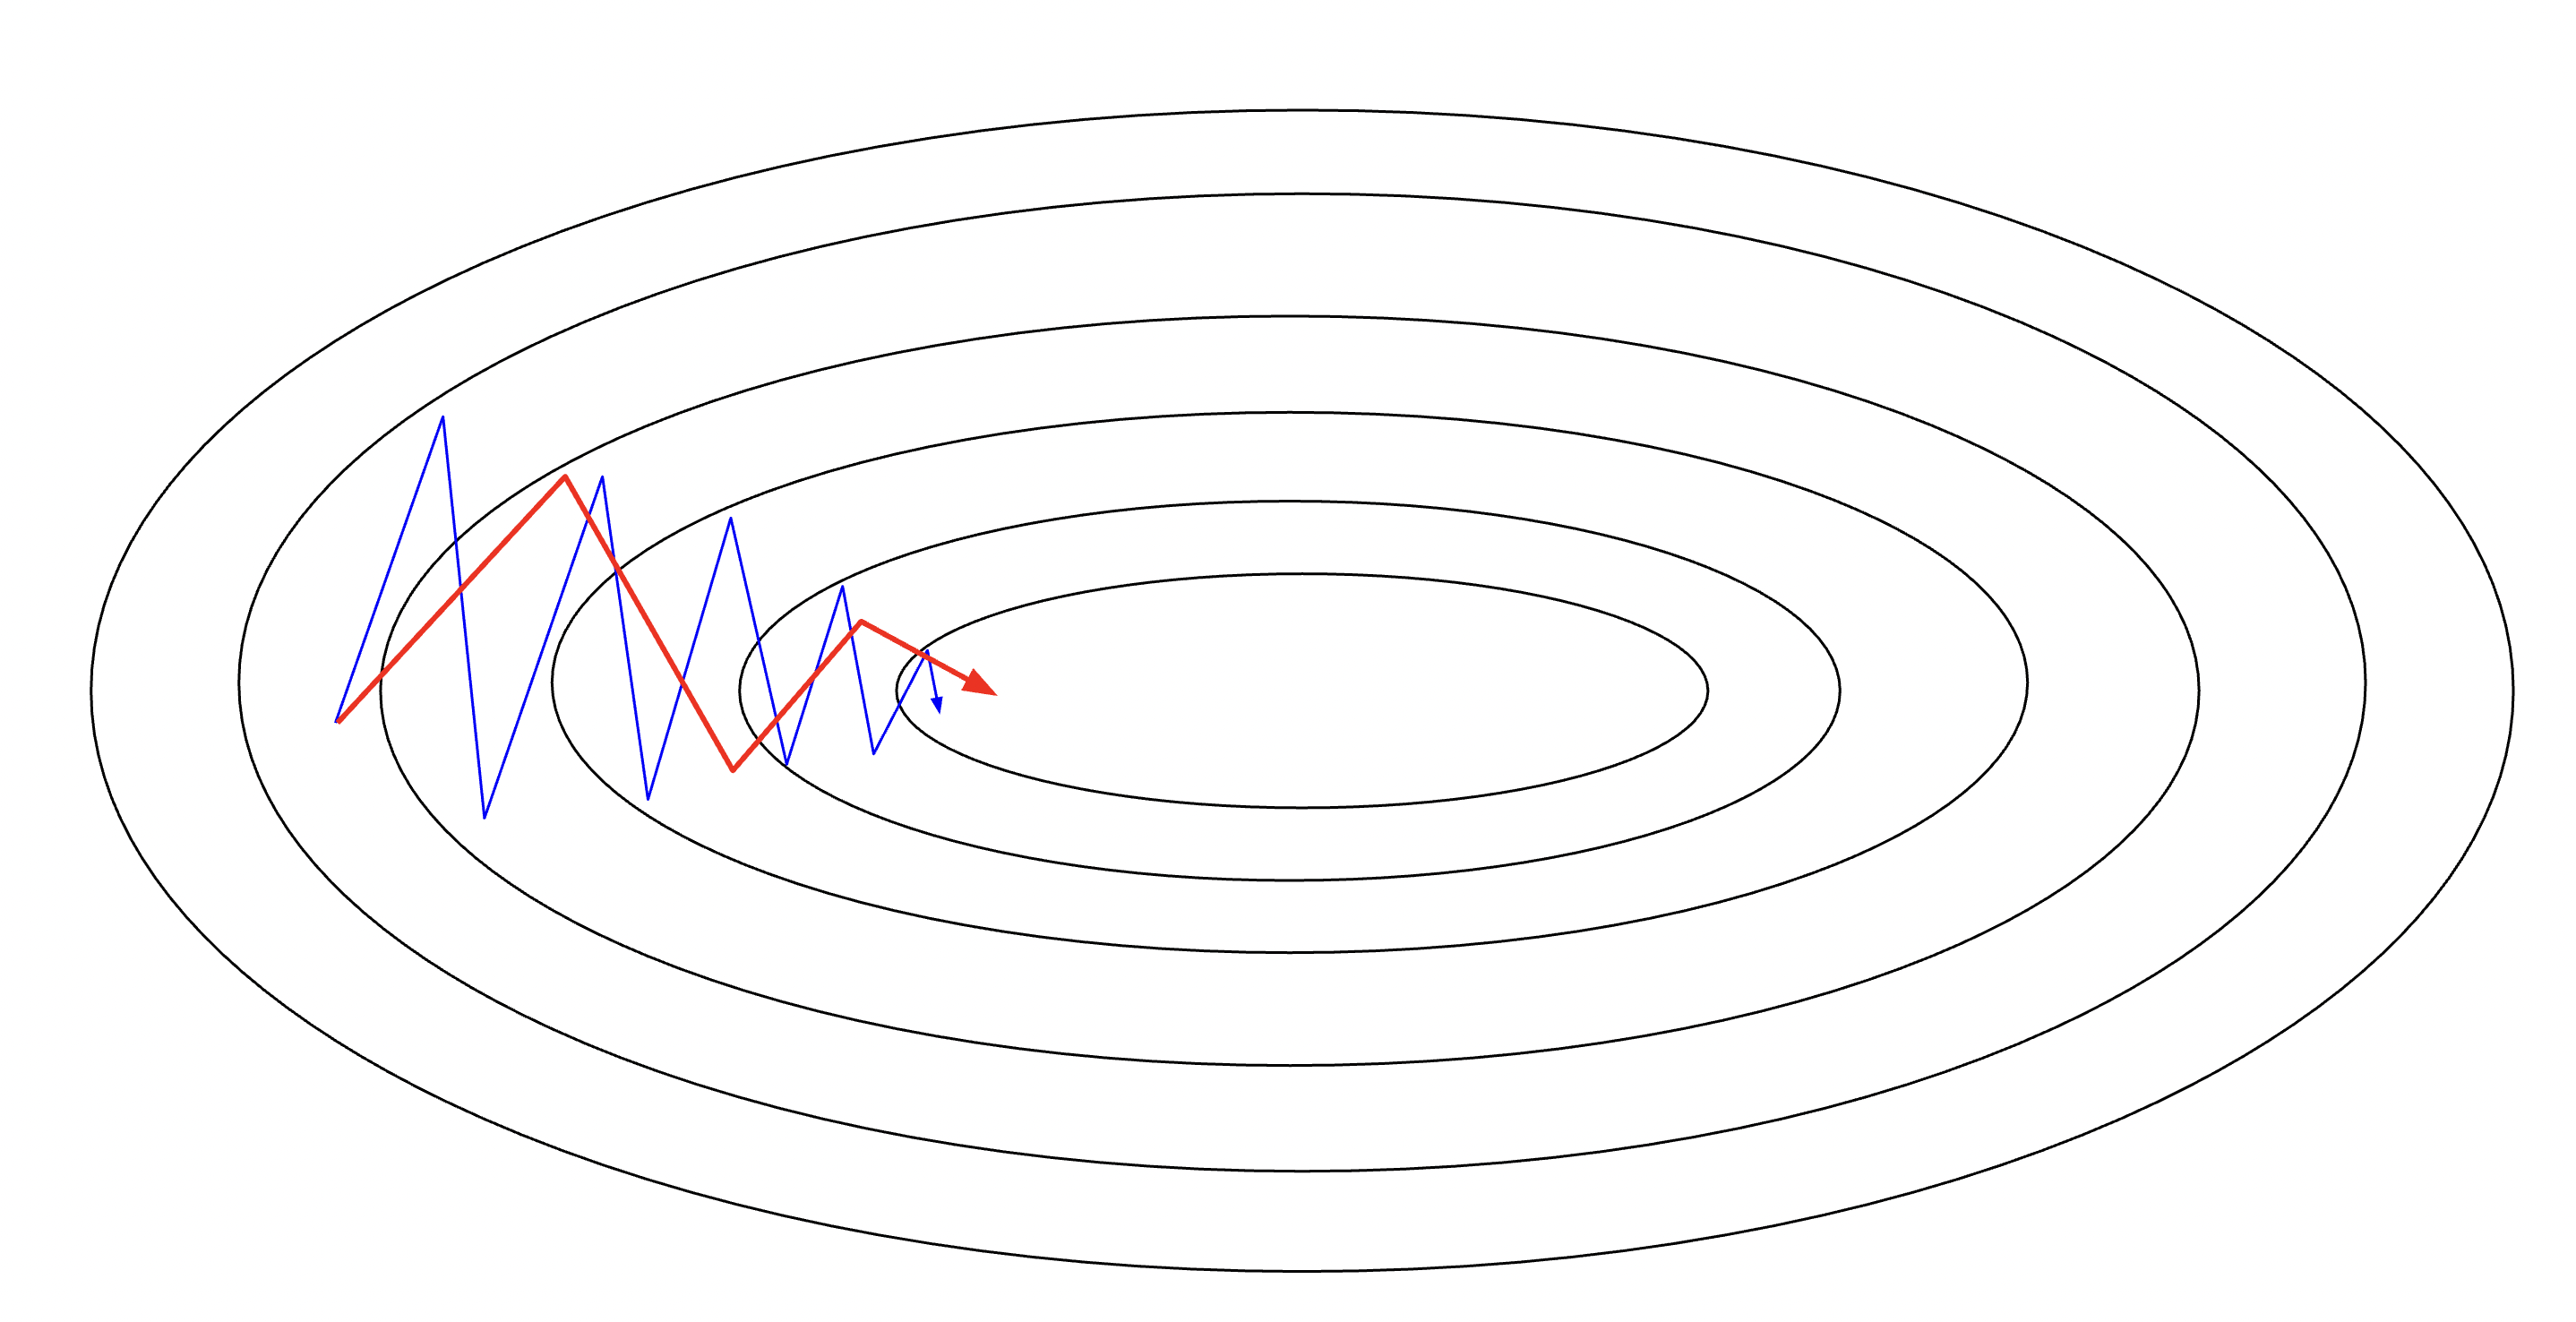

# Мини-пакетный стохастический градиентный спуск (Mini-batched SGD)

Это крайний рассматриваемый алгоритм градиентного спуска(ГС). Понять его довольно просто, т.к. мы уже познакомились с пакетным и стохастическим ГС. На каждом шаге вместо вычисления градиентов на основе полного обучающего набора (как в пакетном ГС) или только одного образца ( как в стохастическом ГС) мини-пакетный ГС вычисляет градиентны на небольших случайных наборах образцов, которые называются **мини-пакетами**. Главное превосходство мини-пакетного ГС над стохастическим ГС в том, что вы можете получить подъем производительности от аппаратной оптимизации матричных операций, особенно когда используются графические процессоры.
В результате мини-пакетный ГС закончит блуждения чуть ближе к минимуму, чем SGD. Но с другой стороны ему может быть труднее уйти от локальных минимумов.

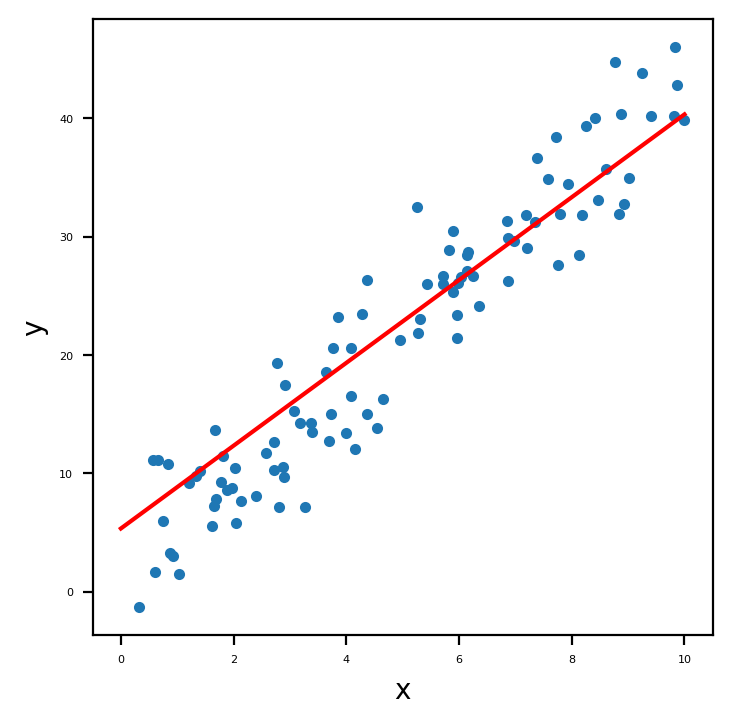

[[5.35403647]
 [3.49741524]]


In [135]:
def batched_sgd_linear_regresion(X, y, n_epochs = 10, minibatch_size = 16, eta = 0.01):
  m = X.shape[0]
  theta_path = []
  theta = np.random.randn(2,1)*5

  for i in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    for j in range(0, m, minibatch_size):
      xi = X_b[shuffled_indices][j:j+minibatch_size] # берем 16 рандомных элементов из обучающего набора
      yi = y[shuffled_indices][j:j+minibatch_size] # берем 16 рандомных элементов из обучающего набора
      grads = 2/m * xi.T.dot(xi.dot(theta) - yi)
      theta = theta - eta * grads

      theta_path.append(theta)
  
  return theta, np.array(theta_path)

theta, batched_sgd_theta_path = batched_sgd_linear_regresion(X,y)
x_for_line = np.array([0,10])
pred_line = theta[1]*x_for_line + theta[0]

plt.plot(X,y, '.')
plt.plot(x_for_line, pred_line, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(theta)

### Сравнение методов

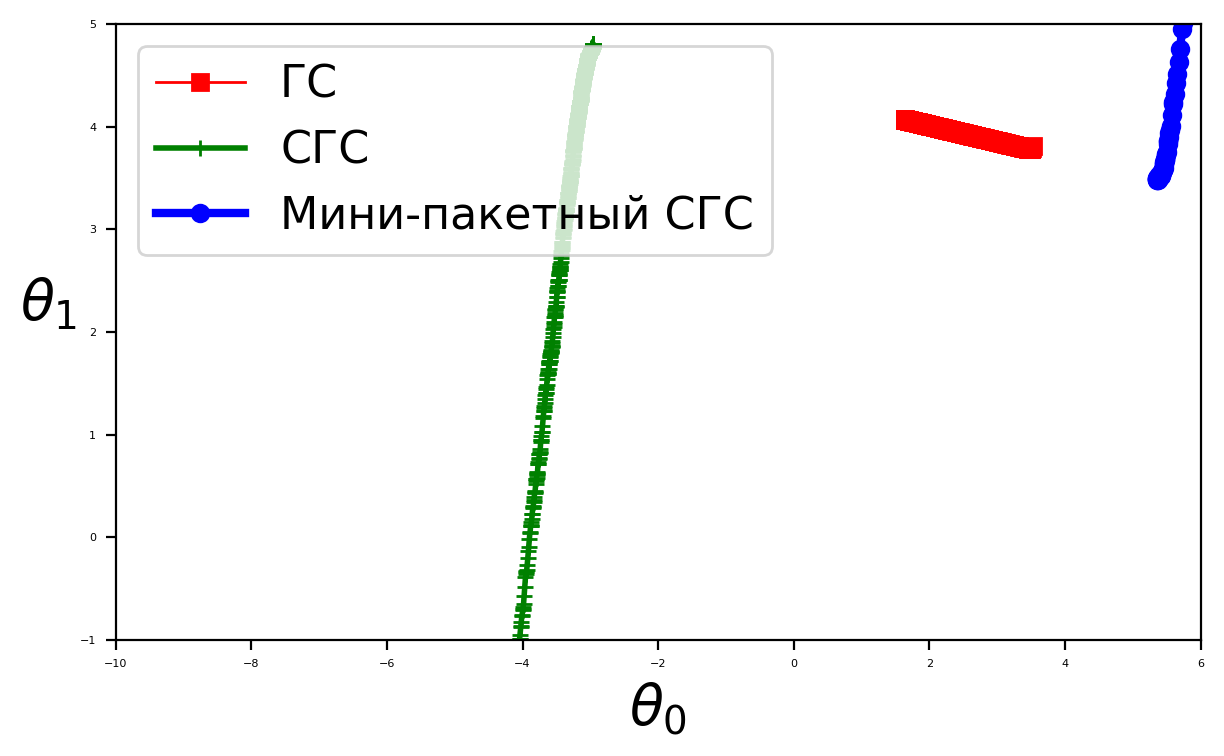

In [138]:
plt.figure(figsize=(7,4))
plt.plot(gd_theta_path[:, 0], gd_theta_path[:, 1], "r-s", linewidth=1, label="ГС")
plt.plot(sgd_theta_path[:, 0], sgd_theta_path[:, 1], "g-+", linewidth=2, label="СГС")
plt.plot(batched_sgd_theta_path[:, 0], batched_sgd_theta_path[:, 1], "b-o", linewidth=3, label="Мини-пакетный СГС")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([-10, 6, -1, 5])
plt.show()
"""График показывает как во время обучения менялись параметры a и b"""

  - GD требует больше всего памяти для вычисления
  - SGD сходиться к GD при достаточном числе итераций и угасанию LR после каждой итерации;
  - SGD и Batched SGD меньше подвержены "застреванию" в локальных минимумах;
  - Batched SGD хорошо подходит для параллельных вычислений;
  - Batched SGD сходится к минимуму быстрее чем SGD, но при этом с более высокой вероятностью "застревает" в локальных минимумах;
  - При слишком большом размере мини-пакета Batched SGD для более сложных чем линейная регрессия моделей возможно переобучение (потеря локального оптимума для всей выборки данных в пользу подвыборки (мини-пакета));
  - SGD и Mini-batch SGD можно использовать для online обучения (адоптация).

### Стохастический ГС для линейной регрессии в Scikit-Learn

In [12]:
from sklearn.linear_model import SGDRegressor
X = 2 * np.random.rand(100, 1) #получаем значение исходных данных
a = 3
b = 4
y = b + a * X + np.random.randn(100, 1) # создаем функцию
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1) # создаем модель стахостического градиентного спуска
sgd_reg.fit(X, y.ravel()) #Тренируем модель
print(f'Значение b: {sgd_reg.intercept_}\nЗначение a: {sgd_reg.coef_}') #Получаем коээффициенты

Значение b: [4.30215621]
Значение a: [2.64254674]


### Сравнение алгоритмов
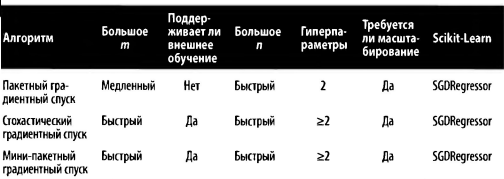
